## Task 2 - Classification with Logistic Regression

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Load Data

In [ ]:
data = pd.read_csv('1) iris.csv')
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


### Preprocessing

Checking information of data

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
print(data.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Label encoding is a method in data processing that is used to convert values ​​in a category column into numeric values ​​or labels. All forms of text in the form of labels such as the features explained above are made into a numeric value.

In [ ]:
# Label Encoding
if data['species'].dtype == 'object':
    le = LabelEncoder()
    data['species'] = le.fit_transform(data['species'])

In [ ]:
X = data.drop('species', axis=1)
y = data['species']

In [ ]:
# Feature normalization using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Splitting data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Training process

##### Logistic regression

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

##### Random forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

##### SVM (Support Vector Machine)

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

### Evaluate model

In [ ]:
def evaluate(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"=== {model_name} ===")
    print("Akurasi:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

Accuracy report

In [ ]:
evaluate(log_model, X_test, y_test, "Logistic Regression")
evaluate(rf_model, X_test, y_test, "Random Forest")
evaluate(svm_model, X_test, y_test, "SVM")

=== Logistic Regression ===
Akurasi: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



=== Random Forest ===
Akurasi: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##### Confusion matrix

In [ ]:
def plot_conf_matrix(y_true, y_pred, title):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(f'{title} - Confusion Matrix')
  plt.show()

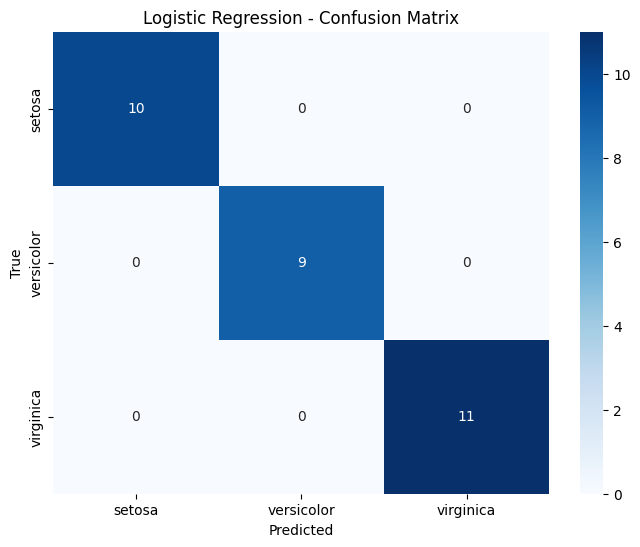

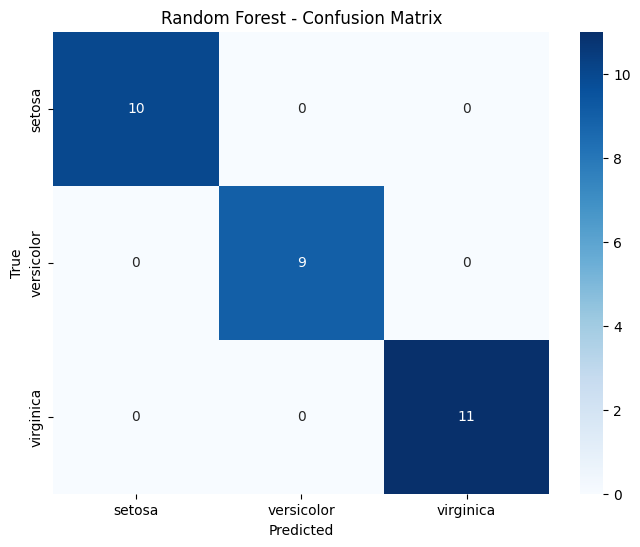

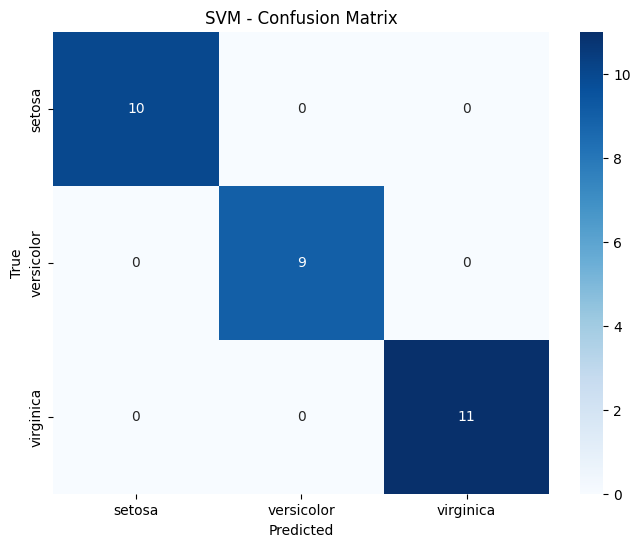

In [ ]:
# Confusion matrix for logistic regression
y_pred_log = log_model.predict(X_test)
plot_conf_matrix(y_test, y_pred_log, 'Logistic Regression')

#Confusion matrix for Random forest
y_pred_rf = rf_model.predict(X_test)
plot_conf_matrix(y_test, y_pred_rf, 'Random Forest')

#Confusion matrix for SVM
y_pred_svm = svm_model.predict(X_test)
plot_conf_matrix(y_test, y_pred_svm, 'SVM')

##### ROC curve

A Receiver Operating Characteristic (ROC) curve is a visual tool used to assess the performance of a binary classification model. It plots the True Positive Rate (TPR)—also known as sensitivity—against the False Positive Rate (FPR), which is calculated as 1 minus specificity, across different classification thresholds. This curve helps illustrate the trade-off between correctly identifying positive cases and incorrectly classifying negatives as positives, making it especially useful for comparing multiple classifiers or choosing the best threshold for decision-making.

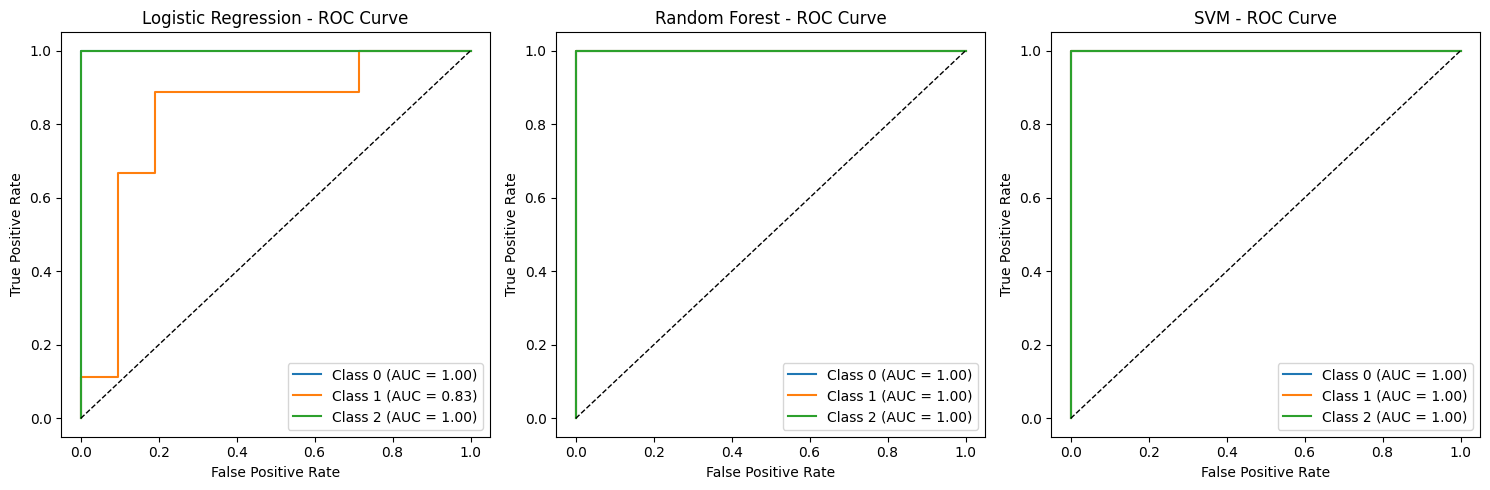

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc

y_bin = label_binarize(y, classes=[0,1,2])
n_classes = y_bin.shape[1]

# Split ulang dengan label binarized
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X_scaled, y_bin, test_size=0.2, random_state=42)

# Buat classifier OvR
classifiers = {
    'Logistic Regression': OneVsRestClassifier(LogisticRegression()),
    'Random Forest': OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42)),
    'SVM': OneVsRestClassifier(SVC(probability=True))
}

# Plot ROC Curve
plt.figure(figsize=(15, 5))

for i, (name, clf) in enumerate(classifiers.items(), 1):
    clf.fit(X_train, y_train_bin)
    y_score = clf.predict_proba(X_test)

    # Hitung ROC dan AUC untuk tiap kelas
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for c in range(n_classes):
        fpr[c], tpr[c], _ = roc_curve(y_test_bin[:, c], y_score[:, c])
        roc_auc[c] = auc(fpr[c], tpr[c])

    # Plot semua ROC untuk setiap kelas
    plt.subplot(1, 3, i)
    for c in range(n_classes):
        plt.plot(fpr[c], tpr[c], label=f"Class {c} (AUC = {roc_auc[c]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.title(f"{name} - ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()